In [32]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk import word_tokenize
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('train_dataset.csv')

In [3]:
df_test = pd.read_csv('test_dataset.csv')

In [4]:
print(df_train.shape)
print(df_test.shape)

(3216, 35)
(804, 34)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                3216 non-null   int64  
 1   Unnamed: 0.1              3216 non-null   int64  
 2   key                       3216 non-null   object 
 3   ID                        3216 non-null   float64
 4   create_date               3216 non-null   object 
 5   user                      3216 non-null   object 
 6   userID                    3216 non-null   float64
 7   RT_TF                     3216 non-null   bool   
 8   full_text                 3216 non-null   object 
 9   Sample.ID.x               3216 non-null   int64  
 10  Sample.ID.y               3216 non-null   int64  
 11  Still.Exists.x            3216 non-null   bool   
 12  Still.Exists.y            3216 non-null   bool   
 13  In.English.x              3216 non-null   bool   
 14  In.Engli

In [6]:
df_train.describe()

,Unnamed: 0,Unnamed: 0.1,ID,userID,Sample.ID.x,Sample.ID.y,Sentiment.Rating.x,Sentiment.Rating.y,Calling.Out.x,Calling.Out.y,Is.About.the.Holocaust.x,Is.About.the.Holocaust.y,IHRA.Section.x,IHRA.Section.y,Is.About.The.Holocaust.x,Is.About.The.Holocaust.y,Target
count,3216.000000,3216.000000,3.216000e+03,3.216000e+03,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,2264.000000,2264.000000,3216.000000,3216.000000,952.000000,952.000000,3216.000000
mean,1999.877799,1999.877799,1.215330e+18,4.117402e+17,242.249378,242.249378,2.768035,2.707090,0.281405,0.204913,0.105565,0.072880,11.282649,11.077114,0.107143,0.093487,0.231032
std,1168.858979,1168.858979,6.075276e+16,5.062683e+17,144.527845,144.527845,0.637587,0.742841,0.449755,0.403701,0.307348,0.259997,3.527015,3.973351,0.309457,0.291267,0.421559
min,0.000000,0.000000,1.079900e+18,1.994321e+06,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,982.500000,982.500000,1.167218e+18,2.608568e+08,118.000000,118.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,10.000000,13.000000,0.000000,0.000000,0.000000
50%,1990.000000,1990.000000,1.225400e+18,2.742042e+09,237.000000,237.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,13.000000,13.000000,0.000000,0.000000,0.000000
75%,3023.500000,3023.500000,1.266368e+18,9.545080e+17,366.250000,366.250000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,13.000000,13.000000,0.000000,0.000000,0.000000
max,4018.000000,4018.000000,1.300530e+18,1.294950e+18,500.000000,500.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,13.000000,13.000000,1.000000,1.000000,1.000000


In [7]:
df_test.describe()

,Unnamed: 0,Unnamed: 0.1,ID,userID,Sample.ID.x,Sample.ID.y,Sentiment.Rating.x,Sentiment.Rating.y,Calling.Out.x,Calling.Out.y,Is.About.the.Holocaust.x,Is.About.the.Holocaust.y,IHRA.Section.x,IHRA.Section.y,Is.About.The.Holocaust.x,Is.About.The.Holocaust.y
count,804.000000,804.000000,8.040000e+02,8.040000e+02,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,569.000000,569.000000,804.000000,804.000000,235.000000,235.000000
mean,2047.988806,2047.988806,1.216575e+18,4.043561e+17,246.123134,246.123134,2.750000,2.705224,0.277363,0.189055,0.138840,0.073814,11.310945,11.075871,0.140426,0.089362
std,1126.943429,1126.943429,5.936689e+16,5.047332e+17,143.946064,143.946064,0.670263,0.761085,0.447976,0.391796,0.346084,0.261698,3.484580,3.948355,0.348170,0.285874
min,6.000000,6.000000,1.080500e+18,1.538300e+04,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1080.250000,1080.250000,1.178702e+18,2.680986e+08,121.000000,121.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,10.000000,13.000000,0.000000,0.000000
50%,2076.000000,2076.000000,1.227295e+18,2.502919e+09,238.500000,238.500000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,13.000000,13.000000,0.000000,0.000000
75%,2992.750000,2992.750000,1.264225e+18,9.341920e+17,371.250000,371.250000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,13.000000,13.000000,0.000000,0.000000
max,4019.000000,4019.000000,1.300430e+18,1.284960e+18,500.000000,500.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,13.000000,13.000000,1.000000,1.000000


In [8]:
# df_train = df_train.drop(labels='Unnamed: 0.1', axis=1)
# df_test = df_test.drop(labels='Unnamed: 0.1', axis=1)


In [9]:
df_train_copy = df_train.copy()
df_train_copy.head()

,Unnamed: 0,Unnamed: 0.1,key,ID,create_date,user,userID,RT_TF,full_text,Sample.ID.x,...,Calling.Out.x,Calling.Out.y,Is.About.the.Holocaust.x,Is.About.the.Holocaust.y,IHRA.Section.x,IHRA.Section.y,sample_name,Is.About.The.Holocaust.x,Is.About.The.Holocaust.y,Target
0,2454,2454,JewNAS,1.232290e+18,Tue Feb 25 07:54:26 -0500 2020,Leafy13222544,1.209270e+18,True,@ShaKeeL__007 @marksul44 @P3ng1z @BernieSander...,366,...,1,0,0.0,0.0,13,13,Jews2020Jan-Apr.rep2,NaN,NaN,0
1,870,870,JewAS,1.272910e+18,Tue Jun 16 11:13:24 -0400 2020,sharonka3,9.752547e+08,True,This is a perfect example of how Jews across N...,68,...,0,0,NaN,NaN,2,2,Jews2020May-Aug.rep1.rep1,0.0,0.0,1
2,763,763,JewAS,1.233040e+18,Thu Feb 27 09:53:39 -0500 2020,SpruceYelverton,1.114823e+09,True,Jews were the major cotton traders &amp; had n...,49,...,0,0,0.0,0.0,2,2,Jews2020Jan-Apr.rep1,NaN,NaN,1
3,3744,3744,KikesAS,1.202940e+18,Fri Dec 06 08:25:54 -0500 2019,plive_calmer,8.404970e+17,False,🙊 I bet #randum The media's slanted view of ki...,45,...,1,1,0.0,0.0,0,0,kikes2019.rep1,NaN,NaN,1
4,1525,1525,JewNAS,1.168870e+18,Tue Sep 03 08:53:53 -0400 2019,emzeekg,2.975341e+09,True,21 year old Palestinian woman murdered by her ...,186,...,0,1,0.0,0.0,13,13,Jews2019.rep2,NaN,NaN,0


## Missing data in the Train Set

In [10]:
import missingno as msno

<AxesSubplot:>

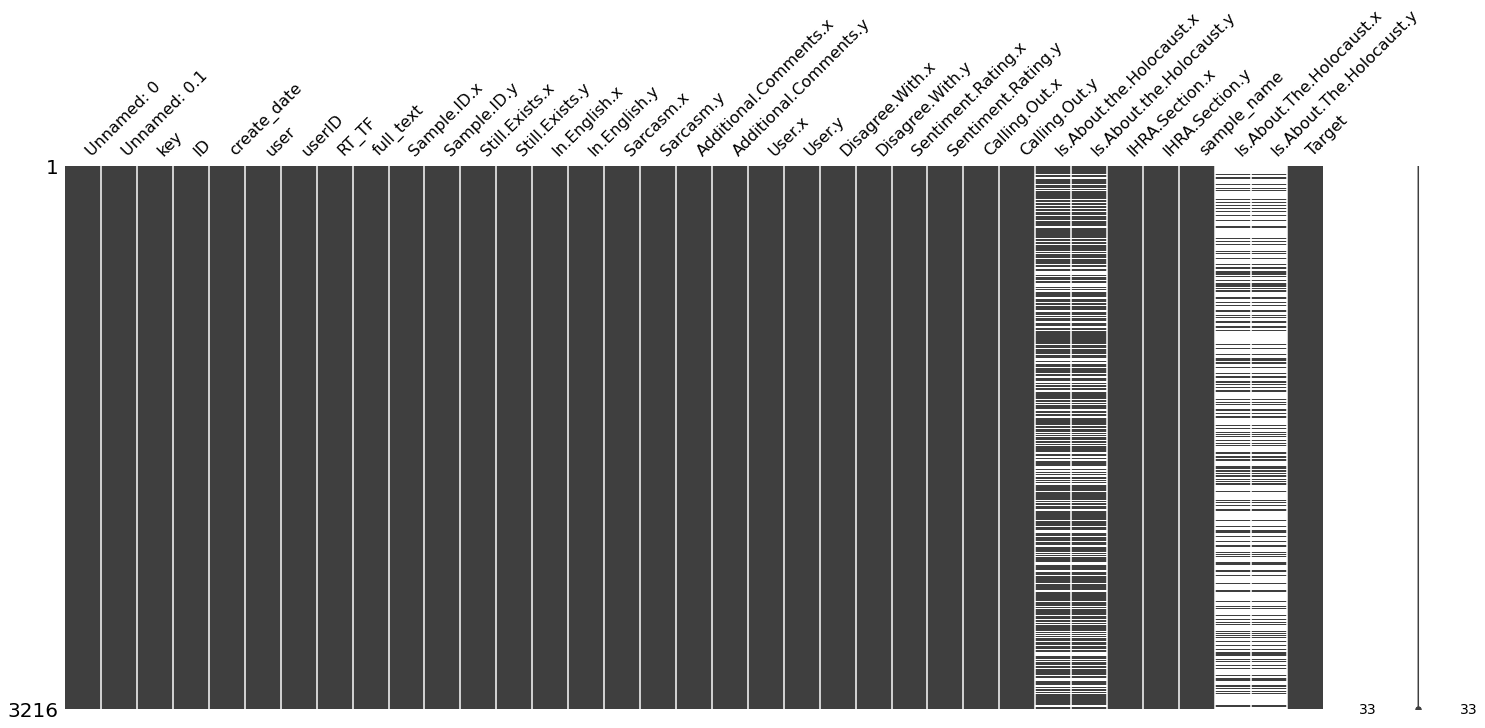

In [11]:
msno.matrix(df_train_copy)

In [12]:
df_train_copy.head()

,Unnamed: 0,Unnamed: 0.1,key,ID,create_date,user,userID,RT_TF,full_text,Sample.ID.x,...,Calling.Out.x,Calling.Out.y,Is.About.the.Holocaust.x,Is.About.the.Holocaust.y,IHRA.Section.x,IHRA.Section.y,sample_name,Is.About.The.Holocaust.x,Is.About.The.Holocaust.y,Target
0,2454,2454,JewNAS,1.232290e+18,Tue Feb 25 07:54:26 -0500 2020,Leafy13222544,1.209270e+18,True,@ShaKeeL__007 @marksul44 @P3ng1z @BernieSander...,366,...,1,0,0.0,0.0,13,13,Jews2020Jan-Apr.rep2,NaN,NaN,0
1,870,870,JewAS,1.272910e+18,Tue Jun 16 11:13:24 -0400 2020,sharonka3,9.752547e+08,True,This is a perfect example of how Jews across N...,68,...,0,0,NaN,NaN,2,2,Jews2020May-Aug.rep1.rep1,0.0,0.0,1
2,763,763,JewAS,1.233040e+18,Thu Feb 27 09:53:39 -0500 2020,SpruceYelverton,1.114823e+09,True,Jews were the major cotton traders &amp; had n...,49,...,0,0,0.0,0.0,2,2,Jews2020Jan-Apr.rep1,NaN,NaN,1
3,3744,3744,KikesAS,1.202940e+18,Fri Dec 06 08:25:54 -0500 2019,plive_calmer,8.404970e+17,False,🙊 I bet #randum The media's slanted view of ki...,45,...,1,1,0.0,0.0,0,0,kikes2019.rep1,NaN,NaN,1
4,1525,1525,JewNAS,1.168870e+18,Tue Sep 03 08:53:53 -0400 2019,emzeekg,2.975341e+09,True,21 year old Palestinian woman murdered by her ...,186,...,0,1,0.0,0.0,13,13,Jews2019.rep2,NaN,NaN,0


In [13]:
df_train_corpus = df_train_copy[['full_text','Target']]

In [14]:
df_train_corpus.head()

,full_text,Target
0,@ShaKeeL__007 @marksul44 @P3ng1z @BernieSander...,0
1,This is a perfect example of how Jews across N...,1
2,Jews were the major cotton traders &amp; had n...,1
3,🙊 I bet #randum The media's slanted view of ki...,1
4,21 year old Palestinian woman murdered by her ...,0


In [15]:
df_train_corpus['full_text']=df_train_corpus['full_text'].apply(lambda x: x.strip())    
df_train_corpus['full_text']=df_train_corpus['full_text'].apply(lambda x: x.lower())    
df_train_corpus['full_text']=df_train_corpus['full_text'].apply(lambda x: x.encode('ascii', 'ignore').decode())    

In [16]:
def remove_punct(text):
    text = re.sub("https*\S+", " ", text)
    text = re.sub("@\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\'\w+", '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\w*\d+\w*', '', text)
    text = re.sub('\s{2,}', " ", text)
    return text

df_train_corpus['full_text']=df_train_corpus['full_text'].apply(lambda x: remove_punct(x))

In [17]:
df_train_corpus.head()

,full_text,Target
0,it wasn the past most of these mizrahi jews w...,0
1,this is a perfect example of how jews across n...,1
2,jews were the major cotton traders amp had nea...,1
3,i bet the media slanted view of kikes mind bl...,1
4,year old palestinian woman murdered by her br...,0


<AxesSubplot:>

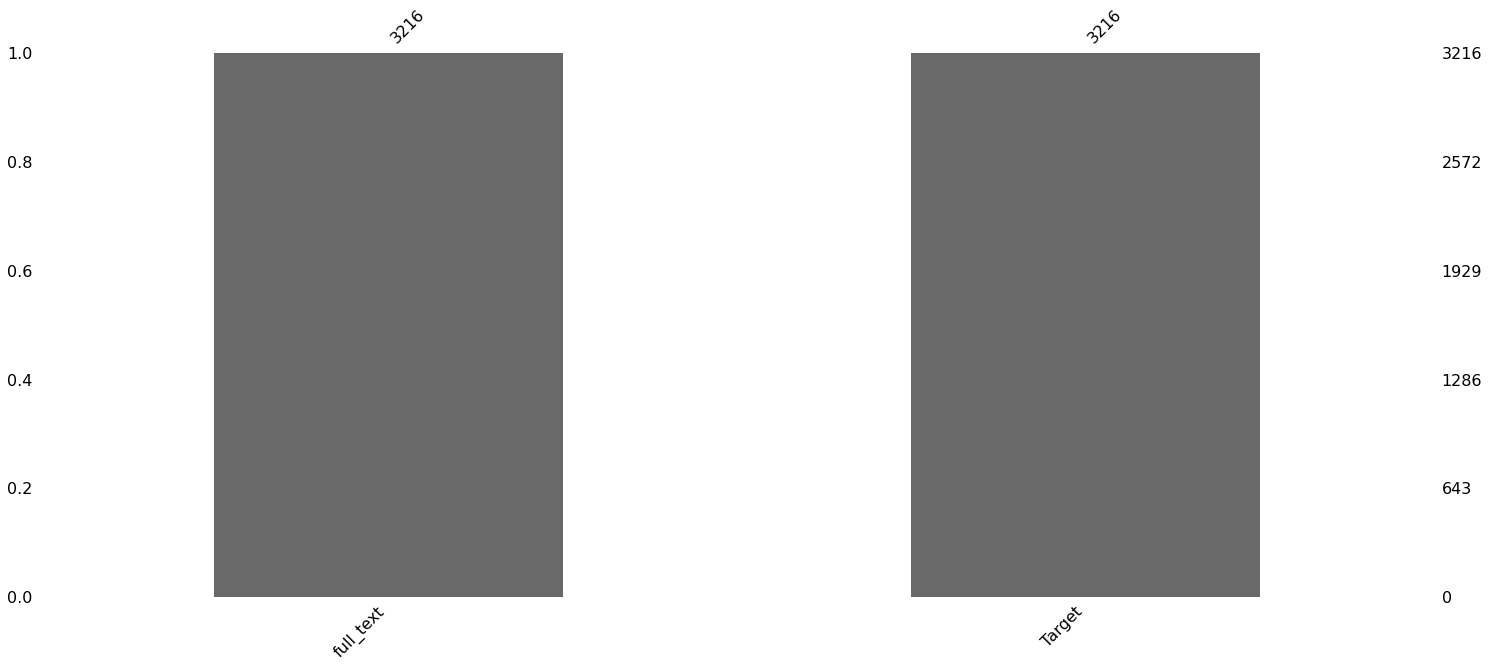

In [18]:
msno.bar(df_train_corpus)

In [19]:
df_test_corpus = df_test[['full_text']]

In [20]:
df_test_corpus['full_text']=df_test_corpus['full_text'].apply(lambda x: x.strip())    
df_test_corpus['full_text']=df_test_corpus['full_text'].apply(lambda x: x.lower())    
df_test_corpus['full_text']=df_test_corpus['full_text'].apply(lambda x: x.encode('ascii', 'ignore').decode())    

In [21]:
df_test_corpus['full_text']=df_train_corpus['full_text'].apply(lambda x: remove_punct(x))

In [22]:
text = df_train_corpus['full_text']

In [23]:
print(text)

0        it wasn the past most of these mizrahi jews w...
1       this is a perfect example of how jews across n...
2       jews were the major cotton traders amp had nea...
3        i bet the media slanted view of kikes mind bl...
4        year old palestinian woman murdered by her br...
                              ...                        
3211      i agree too much islam stop defamation of jews 
3212                               another zionazi pogrom
3213    paul nehlen is a white supremacist who wants t...
3214    the democrats who skip aipac are not friends t...
3215    british people love to talk about saving jews ...
Name: full_text, Length: 3216, dtype: object


In [24]:
df_test_corpus.head()

,full_text
0,it wasn the past most of these mizrahi jews w...
1,this is a perfect example of how jews across n...
2,jews were the major cotton traders amp had nea...
3,i bet the media slanted view of kikes mind bl...
4,year old palestinian woman murdered by her br...


In [25]:
X_train, X_test, y_train, y_test = train_test_split(text, df_train_corpus['Target'], test_size=0.25, random_state=42)

In [26]:
X_train.head()

869      israel aided india with mortar and ammunition...
944     madam jews orthodox catholics muslims all have...
2632    big joke the us senate passed a law granting q...
744      avigdor lieberman israel beyteinu will suppor...
226     zionazism gov employees undeclared israeli ass...
Name: full_text, dtype: object

In [27]:
vectorizer = CountVectorizer(max_features = 1000, stop_words = 'english')
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.fit_transform(X_test).toarray()

In [28]:
print(X_train.shape,y_train.shape, X_test.shape,y_test.shape)

(2412, 1000) (2412,) (804, 1000) (804,)


In [29]:
def classifier(clf,X_train, X_test, y_train, y_test):
    clf.fit(X_train,y_train)
    print("Train Results \n")
    y_train_pred  = clf.predict(X_train)
    y_train_prob = clf.predict_proba(X_train)[:,1]

    print("Confusion Matrix for Train : \n", confusion_matrix(y_train, y_train_pred))
    print("Accuracy Score for Train : ", accuracy_score(y_train, y_train_pred))
    print("ROC AUC for Train : ", roc_auc_score(y_train, y_train_prob))

    print("Test Results \n")
    y_test_pred  = clf.predict(X_test)
    y_test_prob = clf.predict_proba(X_test)[:,1]


    print("Confusion Matrix for Test : \n", confusion_matrix(y_test, y_test_pred))
    print("Accuracy Score for Test : ", accuracy_score(y_test, y_test_pred))
    print("ROC AUC for Test : ", roc_auc_score(y_test, y_test_prob))


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score


In [30]:
# Fitting a simple Logistic Regression on TFIDF
clf = LogisticRegression(C=1.0)
clf.fit(X_train, y_train)
predictions = clf.predict_proba(X_test)



In [34]:
classifier(clf,X_train, X_test, y_train, y_test)

Train Results 

Confusion Matrix for Train : 
 [[1817   21]
 [ 146  428]]
Accuracy Score for Train :  0.9307628524046434
ROC AUC for Train :  0.9781277369356937
Test Results 

Confusion Matrix for Test : 
 [[531 104]
 [ 97  72]]
Accuracy Score for Test :  0.75
ROC AUC for Test :  0.6948516050878255


In [41]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=15,max_features=50,n_estimators=400,random_state=4)
classifier(rfc,X_train, X_test, y_train, y_test)

Train Results 

Confusion Matrix for Train : 
 [[1835    3]
 [ 255  319]]
Accuracy Score for Train :  0.8930348258706468
ROC AUC for Train :  0.941780756996129
Test Results 

Confusion Matrix for Test : 
 [[579  56]
 [ 93  76]]
Accuracy Score for Test :  0.8146766169154229
ROC AUC for Test :  0.6869356567115501


In [46]:
df_test_corpus_ = vectorizer.fit_transform(df_test_corpus['full_text']).toarray()

In [47]:
df_test_corpus_.shape

(804, 1000)

In [48]:
rfc_sub = RandomForestClassifier(max_depth=15,max_features=50,n_estimators=400,random_state=4)
y_train_pred  = clf.predict(df_test_corpus_)
y_train_prob = clf.predict_proba(df_test_corpus_)[:,1]

In [51]:
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [49]:
y_train_prob

array([3.22372255e-01, 4.36960802e-01, 1.15312609e-01, 3.62423420e-01,
       2.16811258e-01, 3.90326585e-01, 8.70980102e-03, 3.61617010e-02,
       4.60947263e-01, 3.55167915e-01, 2.49543459e-01, 1.76758320e-01,
       1.82552818e-02, 7.45749356e-02, 5.23308272e-01, 7.86832240e-01,
       9.88930930e-02, 2.30544400e-02, 3.87453660e-01, 5.19540096e-01,
       6.20542548e-01, 2.28625185e-01, 4.66591650e-02, 9.47702279e-02,
       8.26781505e-01, 3.75782560e-01, 9.29342052e-02, 4.75450958e-03,
       2.08765737e-01, 3.68724291e-01, 3.17521206e-02, 5.23028832e-02,
       2.21829383e-01, 8.38252977e-01, 1.95399597e-01, 5.08389511e-01,
       2.69727532e-01, 2.38188520e-01, 2.21211060e-01, 5.87011008e-01,
       3.11540675e-01, 2.26411331e-03, 3.08406701e-01, 1.32582174e-01,
       2.85288070e-01, 2.34527506e-01, 6.29661141e-02, 7.34627357e-01,
       5.77909499e-01, 2.91680662e-02, 2.31437341e-01, 4.69574882e-01,
       1.07890819e-01, 1.83691133e-01, 4.11795791e-01, 7.76169073e-01,
      